# Data Science  Statistics CP 2 

## Objective: Create an automated dataframe analyser from a given dataset.

### Members:
* Gabriel Genaro Dalaqua - RM551986
* Paloma Mirela dos Santos - RM551321

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display, Markdown
import nbformat
from nbconvert import HTMLExporter
from IPython.display import display, HTML
import os

# Insert the path of your dataset here (if it isn´t csv change the command)
df = pd.read_csv("VGS.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Basic Columns Informations: 

Here we will go through the basic informations of each column 

## First of all he have the data types of each column

This is important to know when wondering what kind of plot to use

In [15]:
df.dtypes


Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

## Now we can have a look on the NaN values of each row

Having an idea of how empty your dataset is a crucial point before exploring the data

In [16]:
# Count total NaN at each column in a DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n")

df.isnull().sum() 

 
Count total NaN at each column in a DataFrame : 




Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

## After that we can have a look in the duplicates

Duplicates can be a big problem while exploring the data, if they are not explained or real they´ll distort our analysis

In [17]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## An equally important step before moving on is to handle the outliers

It´s important to get rid, or handle properly, all the outliers of the dataset in order to don´t have an altered analysis 

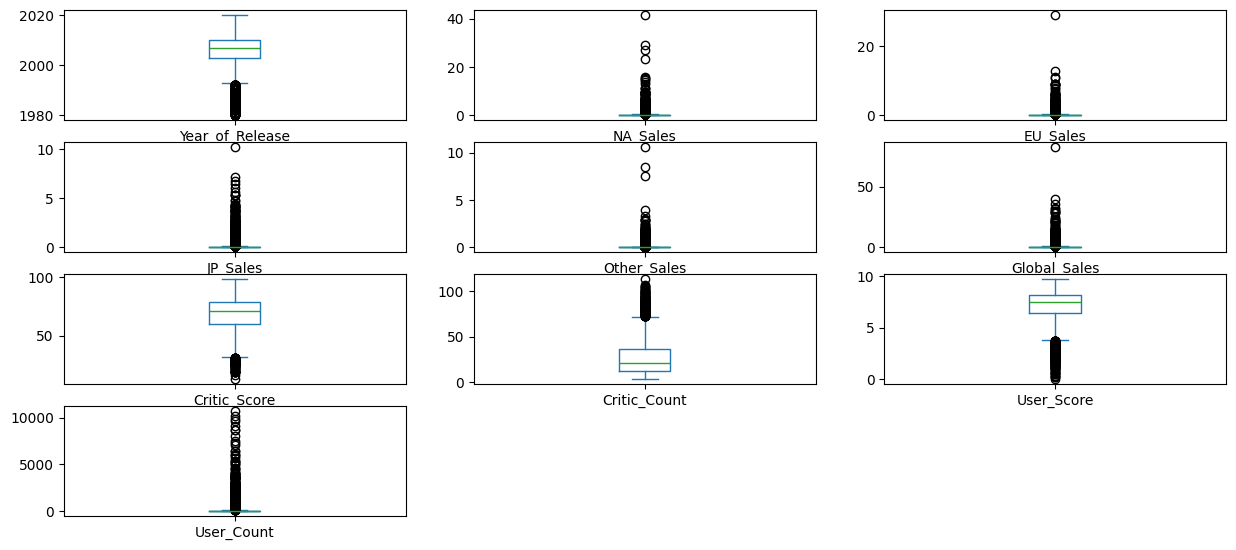

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4659,NFL GameDay 2004,PS2,2003.0,Sports,Sony Computer Entertainment,0.20,0.16,0.00,0.05,0.41,65.0,25.0,8.7,6.0,989 Sports,E
4668,EA Sports UFC 2,XOne,2016.0,Sports,Electronic Arts,0.24,0.14,0.00,0.04,0.41,76.0,42.0,6.0,77.0,EA Sports,T
4671,Tom Clancy's Rainbow Six: Lockdown,XB,2005.0,Shooter,Ubisoft,0.26,0.13,0.00,0.02,0.41,74.0,39.0,6.6,28.0,"Red Storm Entertainment, Ubisoft Montreal",M
4680,Tom Clancy's HAWX 2,PS3,2010.0,Action,Ubisoft,0.21,0.12,0.03,0.05,0.41,70.0,30.0,6.8,19.0,Ubisoft,T
4684,X-Men: The Official Game,PS2,2006.0,Action,Activision,0.20,0.16,0.00,0.05,0.41,52.0,44.0,7.5,20.0,"Z-Axis, Ltd.",T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16664,Prison Architect,XOne,2016.0,Action,Introversion Software,0.01,0.00,0.00,0.00,0.01,74.0,13.0,6.7,7.0,"Introversion, Double Eleven",NaN
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+


In [18]:
def plot_boxplots(df):
    df.plot(kind='box', subplots=True, layout=(int(np.ceil(len(df.columns)/3)), 3), figsize=(15, 10))
    plt.show()


def handle_outliers(df, method='remove', iqr_multiplier=1.5):
    for col in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1 (1st quartile) and Q3 (3rd quartile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # Handle outliers according to the chosen method
        if method == 'remove':
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        elif method == 'cap':
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df
    
plot_boxplots(df)
handle_outliers(df)

# The Graphics

### Here our objective is to have a overview of the Data found in each column of our dataframe:

All "object" type columns are analysed and checked if it is a "categorical" object type or a "variable_text" object type, and decides if we should plot this data on a bar plot or a WordCloud type plot.

All "Numeric" type columns are quickly analysed and plotted onto the most readable graphic type: bar plots




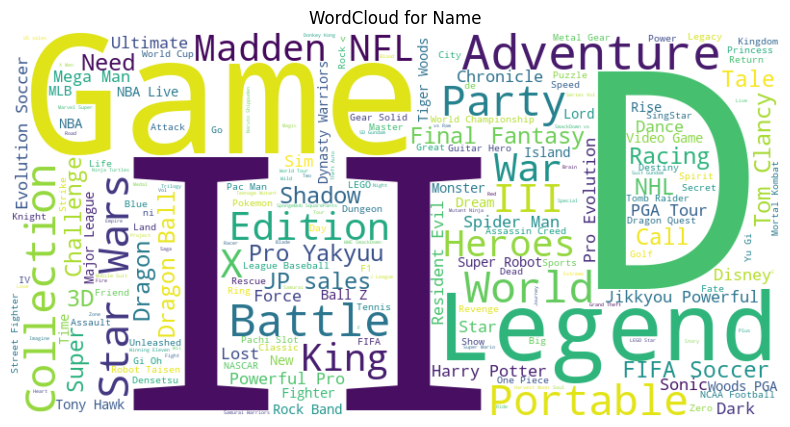

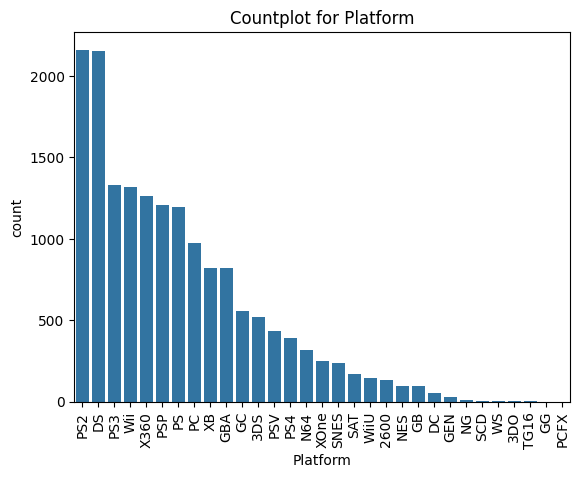

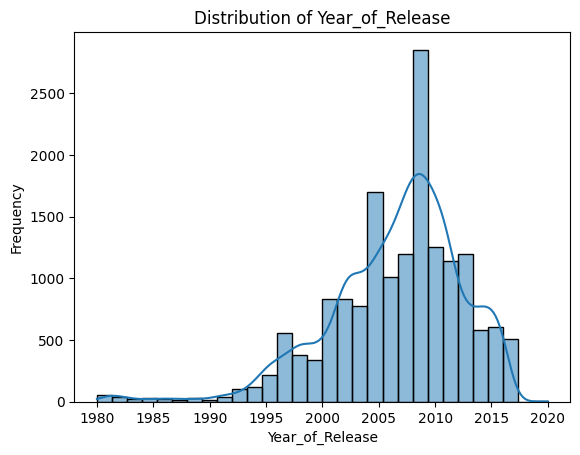

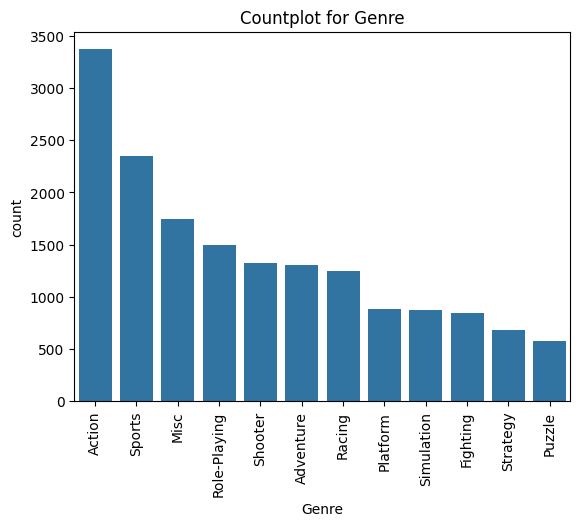

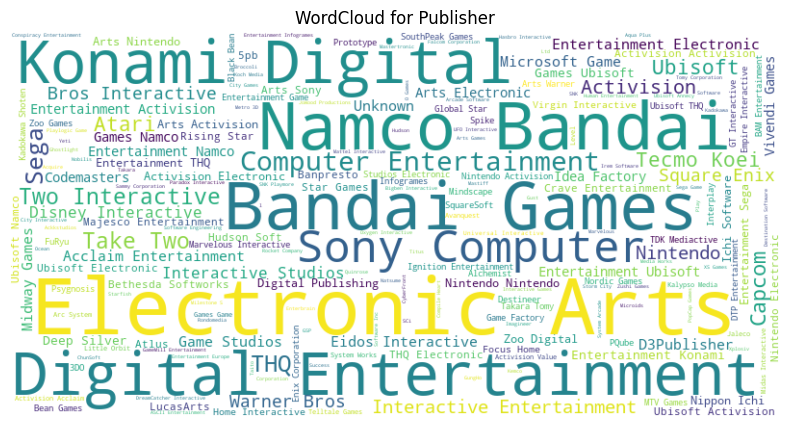

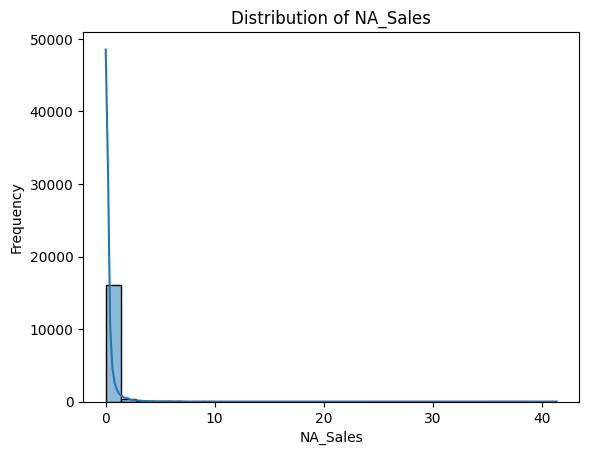

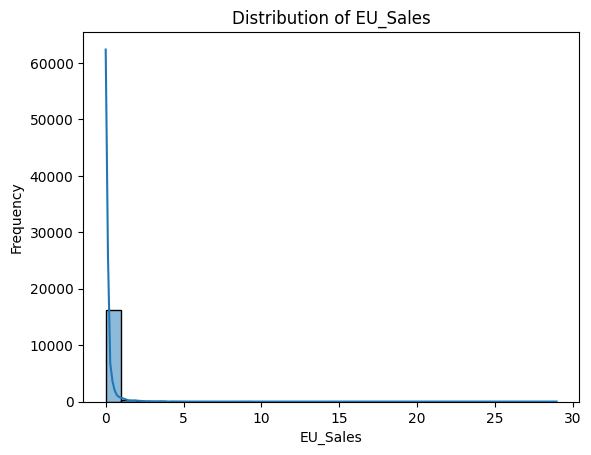

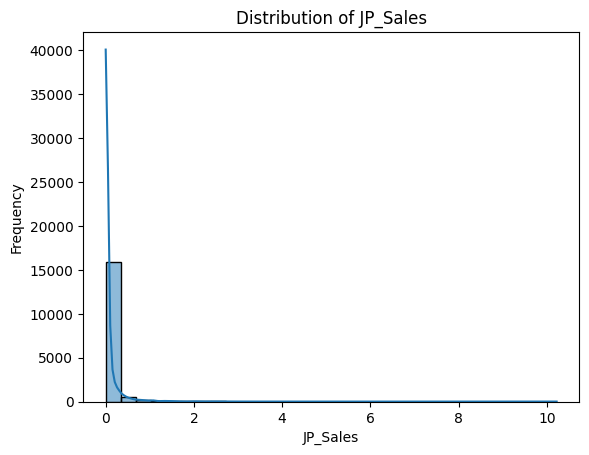

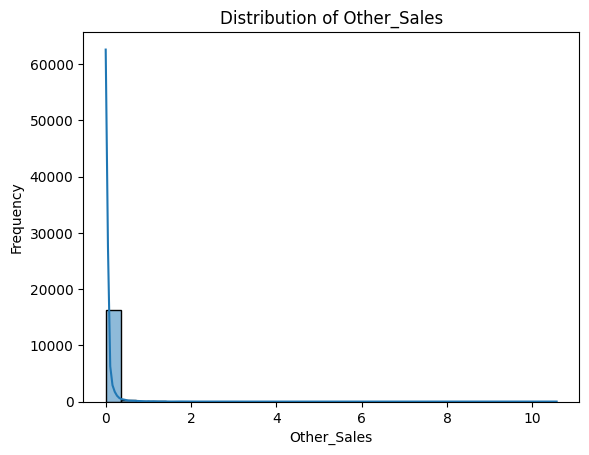

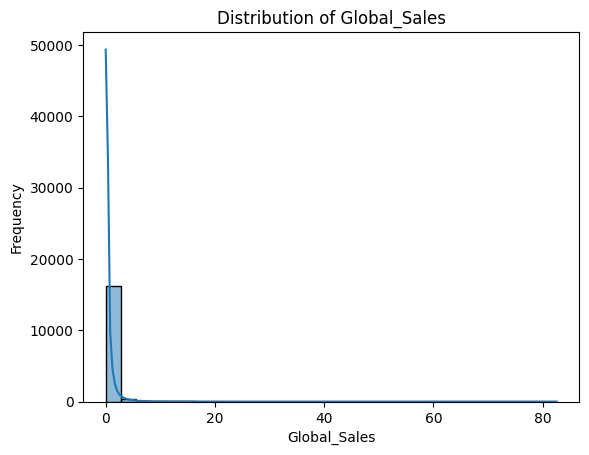

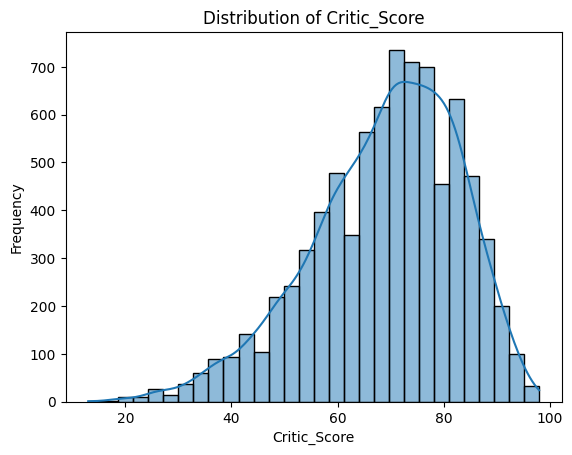

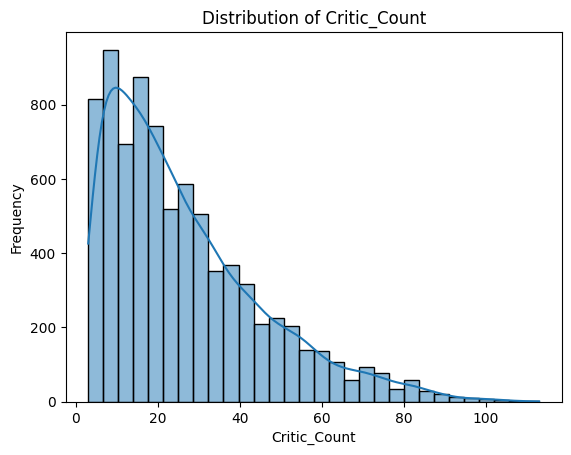

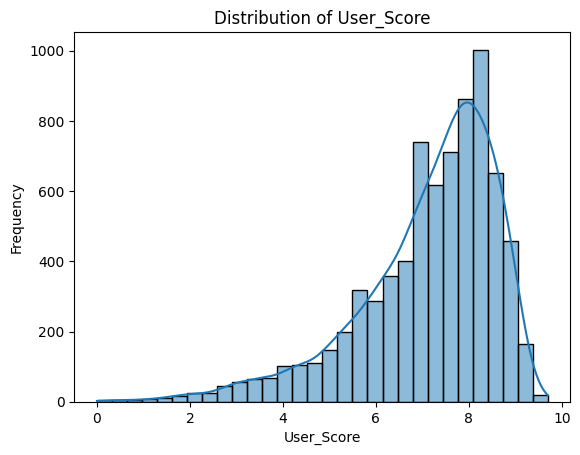

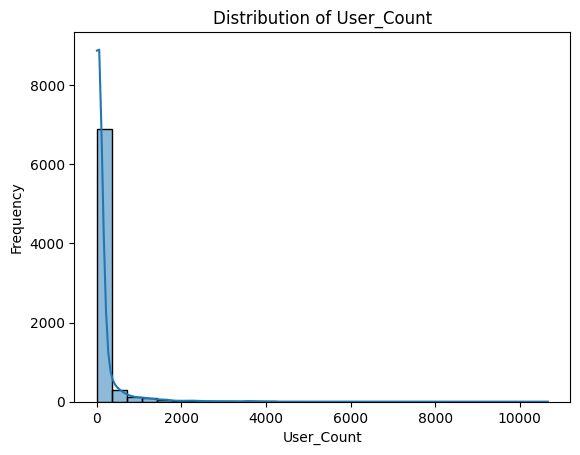

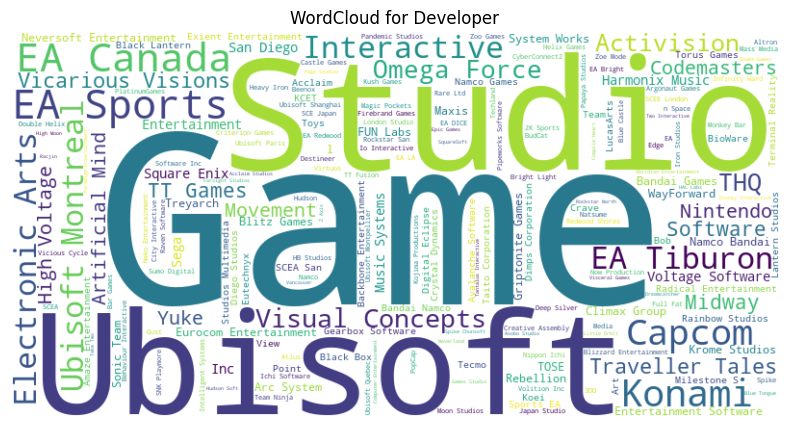

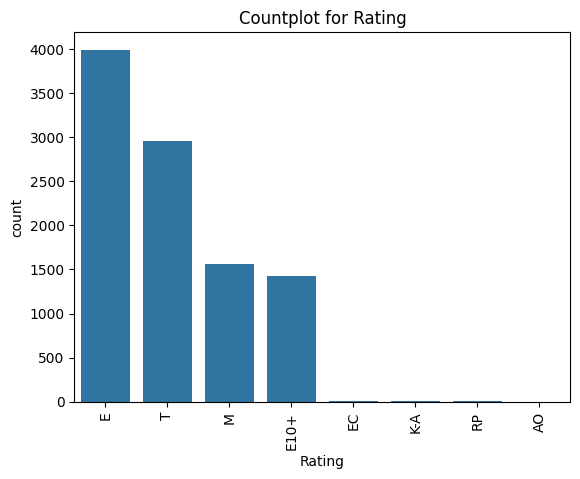

In [19]:
def isCategorical(col):
    # Definição do critério para identificar colunas categóricas
    if len(df[col].unique()) / len(df[col]) < 0.01:
        return True
    else:
        return False

def checkCategory(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            if isCategorical(i):
                plt.figure()  # Cria uma nova figura para cada gráfico
                # Ordenando as categorias pelo valor da contagem
                order = df[i].value_counts().index  # Obtém a ordem das categorias, do menor para o maior
                sns.countplot(x=i, data=df, order=order)
                plt.title(f'Countplot for {i}')
                plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x se necessário
                plt.show()
            else:
                text = " ".join(df[i].dropna().astype(str))  # Une todos os valores da coluna em uma string
                wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                plt.title(f'WordCloud for {i}')
                plt.show()
        elif df[i].dtype in ['int64', 'float64']:  # Se for uma coluna numérica
            plt.figure()  # Cria uma nova figura para o gráfico
            # Plotando o histograma com bins ajustados para mostrar intervalos relevantes
            sns.histplot(df[i], kde=True, bins=30)  # Adiciona KDE para suavizar a visualização
            plt.title(f'Distribution of {i}')
            plt.xlabel(i)
            plt.ylabel('Frequency')
            plt.show()
            
            

# Exemplo de como chamar a função com o dataframe
checkCategory(df)


In [20]:
def isCategorical(col):
    # Definição do critério para identificar colunas categóricas
    if len(df[col].unique()) / len(df[col]) < 0.01:
        return True
    else:
        return False

def analise_categorica(df, coluna):
    contagem = df[coluna].value_counts()
    proporcao = df[coluna].value_counts(normalize=True) * 100
    return pd.concat([contagem, proporcao], axis=1, keys=['Contagem', 'Proporção (%)'])

for coluna in df.columns:
    # Verifica se a coluna é categórica ou numérica
    if isCategorical(coluna):
        display(Markdown(f"### Análise da Coluna Categórica: `{coluna}`"))
        resultado = analise_categorica(df, coluna)
        display(resultado)
    else:
        display(Markdown(f"### A Coluna `{coluna}` não é categórica e foi ignorada na análise."))

### A Coluna `Name` não é categórica e foi ignorada na análise.

### Análise da Coluna Categórica: `Platform`

,Contagem,Proporção (%)
Platform,,
PS2,2161,12.925414
DS,2152,12.871583
PS3,1331,7.961002
Wii,1320,7.895209
X360,1262,7.548298
PSP,1209,7.231294
PS,1197,7.159519
PC,974,5.825707
XB,824,4.928524


### Análise da Coluna Categórica: `Year_of_Release`

,Contagem,Proporção (%)
Year_of_Release,,
2008.0,1427,8.674772
2009.0,1426,8.668693
2010.0,1255,7.629179
2007.0,1197,7.276596
2011.0,1136,6.905775
2006.0,1006,6.115502
2005.0,939,5.708207
2002.0,829,5.039514
2003.0,775,4.711246


### Análise da Coluna Categórica: `Genre`

,Contagem,Proporção (%)
Genre,,
Action,3370,20.159119
Sports,2348,14.045582
Misc,1750,10.468385
Role-Playing,1500,8.972902
Shooter,1323,7.914099
Adventure,1303,7.794461
Racing,1249,7.471436
Platform,888,5.311958
Simulation,874,5.228211


### A Coluna `Publisher` não é categórica e foi ignorada na análise.

### A Coluna `NA_Sales` não é categórica e foi ignorada na análise.

### A Coluna `EU_Sales` não é categórica e foi ignorada na análise.

### A Coluna `JP_Sales` não é categórica e foi ignorada na análise.

### Análise da Coluna Categórica: `Other_Sales`

,Contagem,Proporção (%)
Other_Sales,,
0.00,6604,39.499970
0.01,3464,20.718943
0.02,1619,9.683594
0.03,926,5.538609
0.04,654,3.911717
...,...,...
1.68,1,0.005981
1.82,1,0.005981
1.33,1,0.005981


### A Coluna `Global_Sales` não é categórica e foi ignorada na análise.

### Análise da Coluna Categórica: `Critic_Score`

,Contagem,Proporção (%)
Critic_Score,,
70.0,256,3.146123
71.0,254,3.121544
75.0,245,3.010938
78.0,240,2.949490
73.0,238,2.924911
...,...,...
20.0,3,0.036869
21.0,1,0.012290
17.0,1,0.012290


### Análise da Coluna Categórica: `Critic_Count`

,Contagem,Proporção (%)
Critic_Count,,
4.0,307,3.772889
5.0,273,3.355045
9.0,248,3.047806
11.0,248,3.047806
7.0,243,2.986359
...,...,...
103.0,1,0.012290
102.0,1,0.012290
106.0,1,0.012290


### Análise da Coluna Categórica: `User_Score`

,Contagem,Proporção (%)
User_Score,,
7.8,324,4.268775
8.0,290,3.820817
8.2,282,3.715415
8.3,254,3.346509
8.5,253,3.333333
...,...,...
1.3,2,0.026350
1.0,2,0.026350
0.9,2,0.026350


### A Coluna `User_Count` não é categórica e foi ignorada na análise.

### A Coluna `Developer` não é categórica e foi ignorada na análise.

### Análise da Coluna Categórica: `Rating`

,Contagem,Proporção (%)
Rating,,
E,3991,40.110553
T,2961,29.758794
M,1563,15.708543
E10+,1420,14.271357
EC,8,0.080402
K-A,3,0.030151
RP,3,0.030151
AO,1,0.010050


# Correaltion Matrix

After analysing the data of each column individually, it´s really useful for us to look for any correlations between them

Knowing if a certain column affects other one is a highlight point of a data exploratory analysis

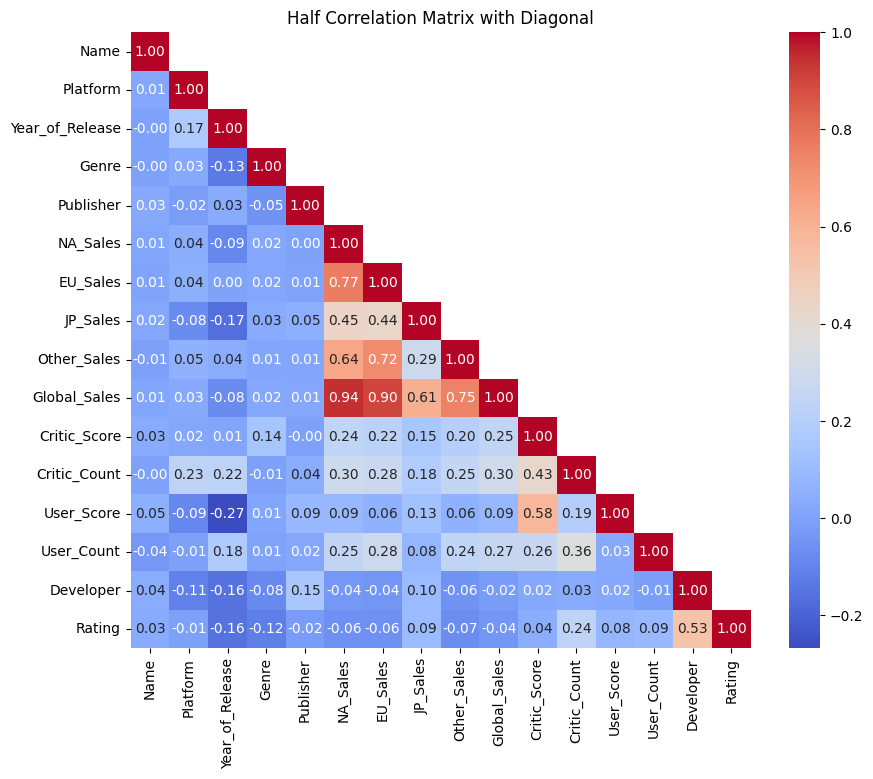

In [21]:
def preprocess_for_correlation(df):
    df_numeric = df.copy()

    # Aplicando Label Encoding em colunas categóricas
    for col in df_numeric.columns:
        if df_numeric[col].dtype == 'object':
            le = LabelEncoder()
            df_numeric[col] = le.fit_transform(df_numeric[col].astype(str))
    
    return df_numeric

def correlation_matrix(df):
    df_processed = preprocess_for_correlation(df)
    corr = df_processed.corr()  # Calcula a matriz de correlação

    # Gerando uma máscara para ocultar a metade superior, exceto a diagonal
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

    # Plotando a matriz de correlação com a máscara
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, mask=mask)
    plt.title('Half Correlation Matrix with Diagonal')
    plt.show()

# Exemplo de como chamar a função com o dataframe
correlation_matrix(df)

# Linear Regression

## Following the correlation matrix we can do some interesting machine learning algorythm: linear regression

Linear Regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (predictors). The goal is to find the best-fitting line (in simple linear regression, this is a straight line) that describes how the target variable changes as the predictor(s) change. Mathematically, it aims to minimize the distance between the predicted values and the actual data points.

Mean Squared Error (MSE) measures the average squared difference between the predicted values and the actual values.


R² Score (Coefficient of Determination) indicates how well the independent variables explain the variation in the dependent variable. It ranges from 0 to 1;

0 means no explanatory power (the model is no better than the mean).
1 means perfect explanatory power (the model explains all the variance in the target).
R² is calculated as:

### In summary:

Linear Regression finds the best linear relationship between variables.
MSE tells how far the predictions are from the actual values.
R² Score shows how well the model explains the variability in the data.

#### For our Linear Regression models and plots we´re only going to consider values that had a correlation value bigger than 0.4 or lower -0.2



-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between NA_Sales and EU_Sales: 0.7653364809397201


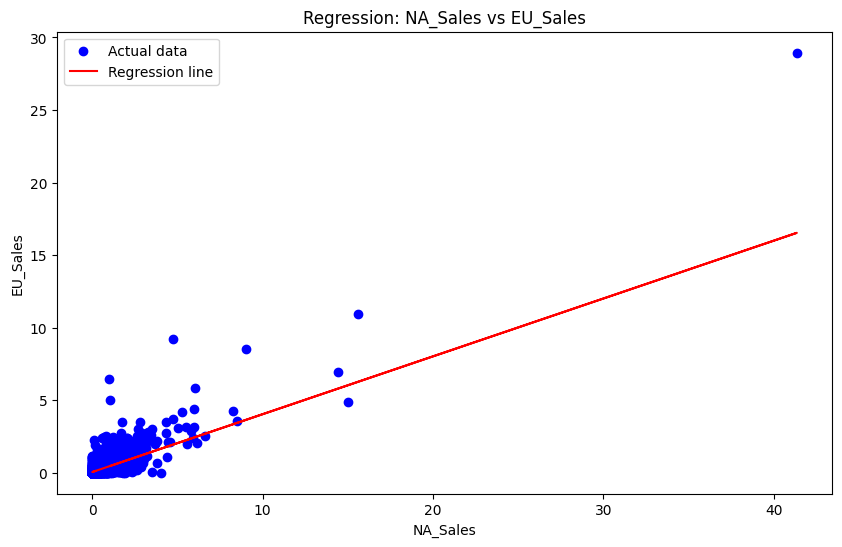

Mean Squared Error: 0.11389324921496886
R^2 Score: 0.6926805456831402


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between NA_Sales and Other_Sales: 0.6386538781708033


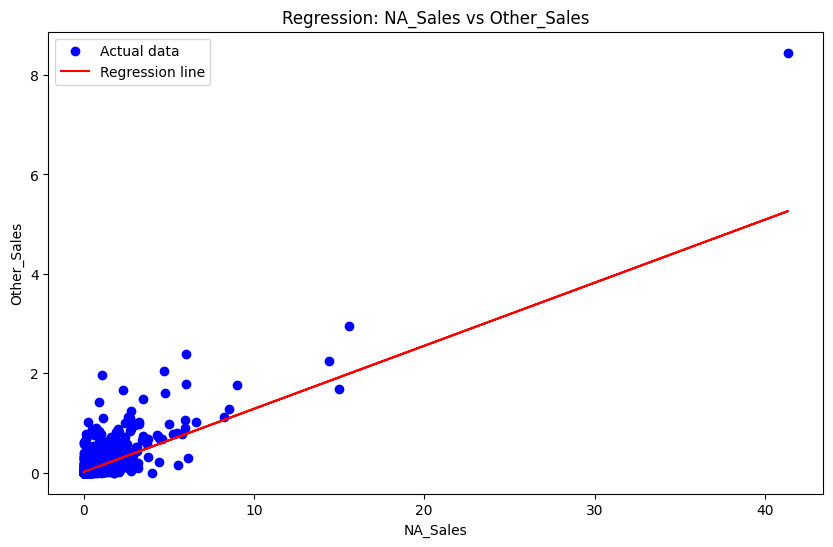

Mean Squared Error: 0.010809273821619782
R^2 Score: 0.6868929211511594


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between NA_Sales and Global_Sales: 0.9410104942592599


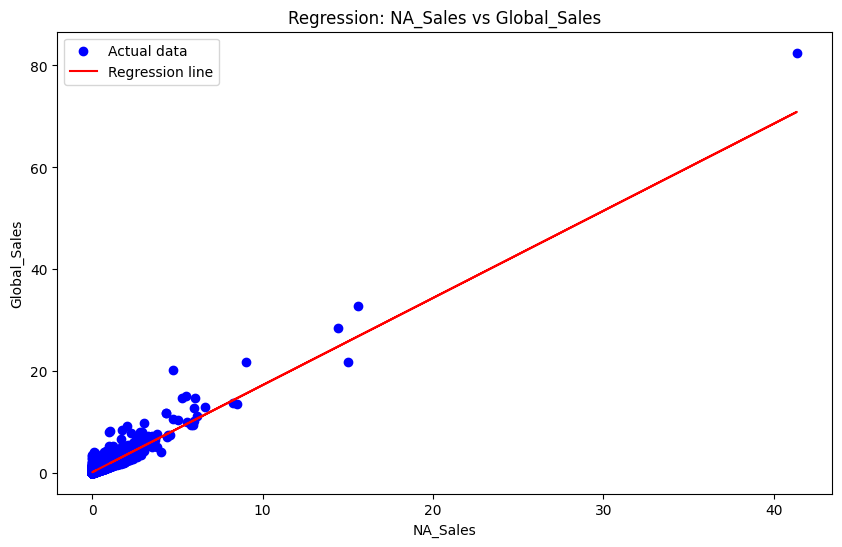

Mean Squared Error: 0.2614275389028355
R^2 Score: 0.9174343102429977


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between EU_Sales and NA_Sales: 0.7653364809397201


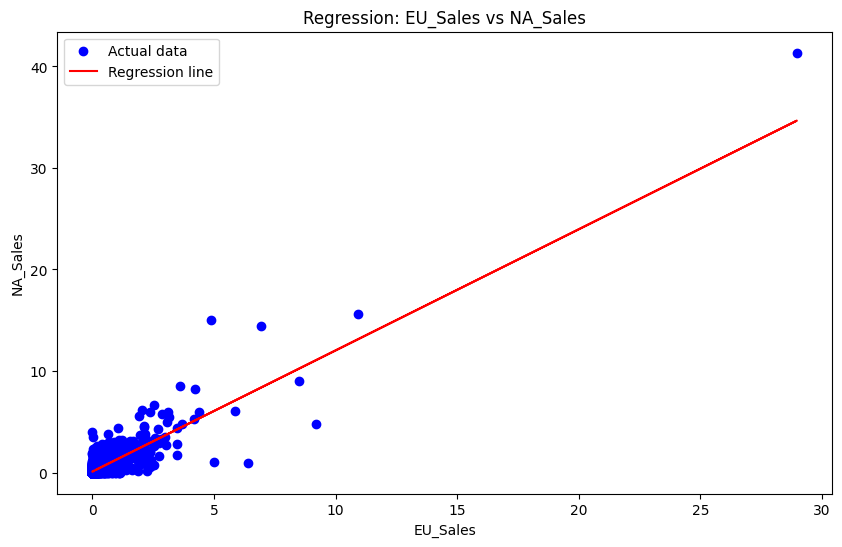

Mean Squared Error: 0.17261456495840974
R^2 Score: 0.7810582469324548


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between EU_Sales and Other_Sales: 0.7227955149848964


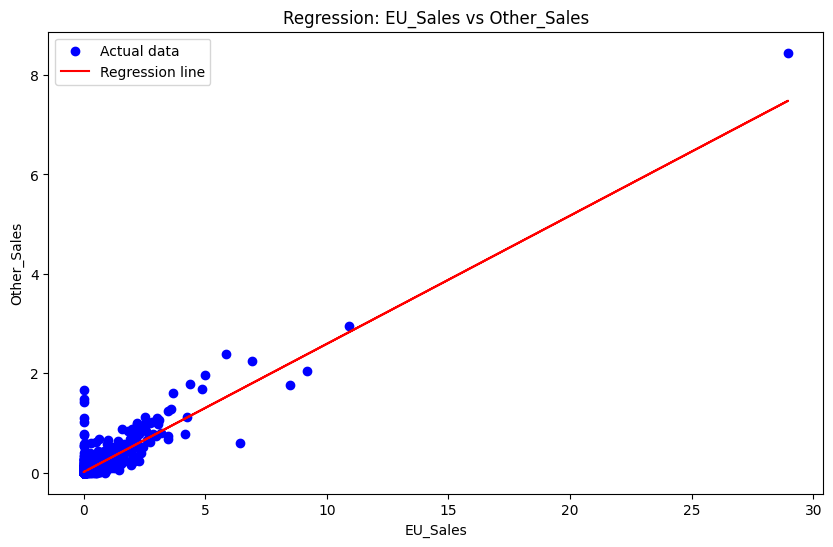

Mean Squared Error: 0.005427788287980708
R^2 Score: 0.8427758456761048


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between EU_Sales and Global_Sales: 0.9012386982359578


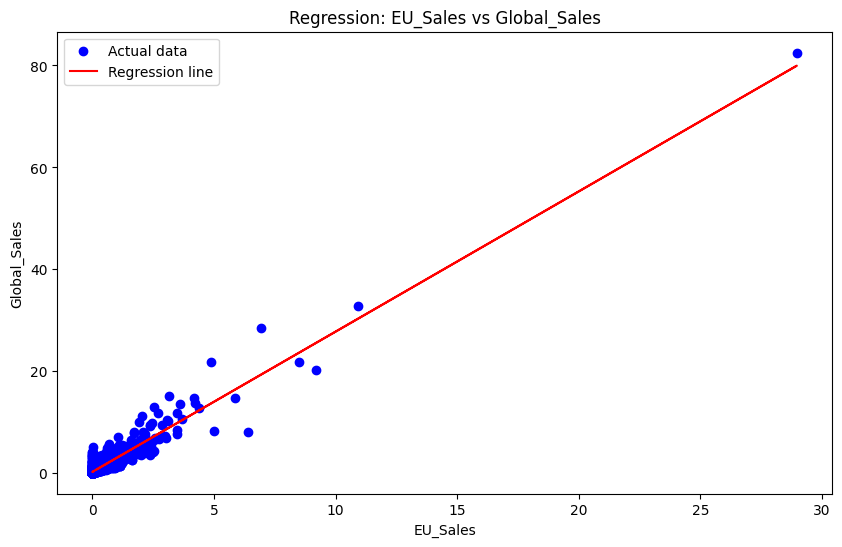

Mean Squared Error: 0.27787095342730356
R^2 Score: 0.9122410476361932


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between JP_Sales and Global_Sales: 0.6123001376779326


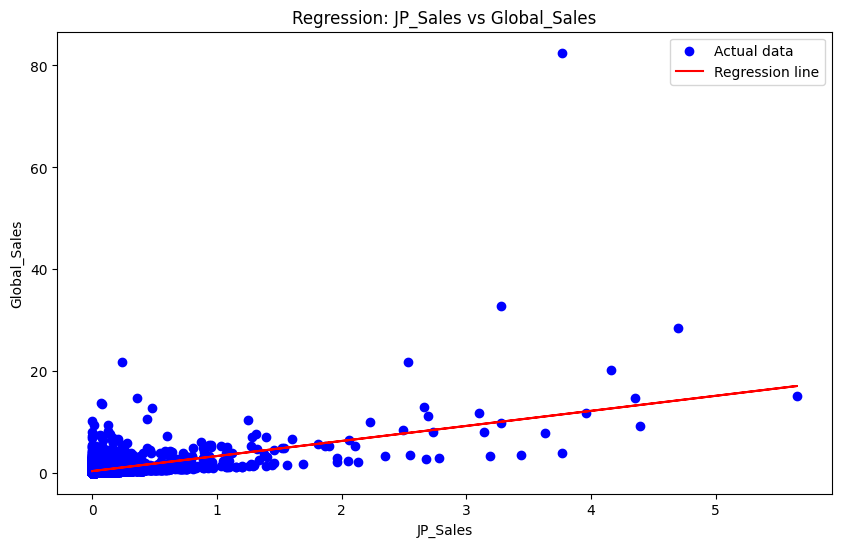

Mean Squared Error: 2.1579913199076692
R^2 Score: 0.31844960723887983


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between Other_Sales and NA_Sales: 0.6386538781708033


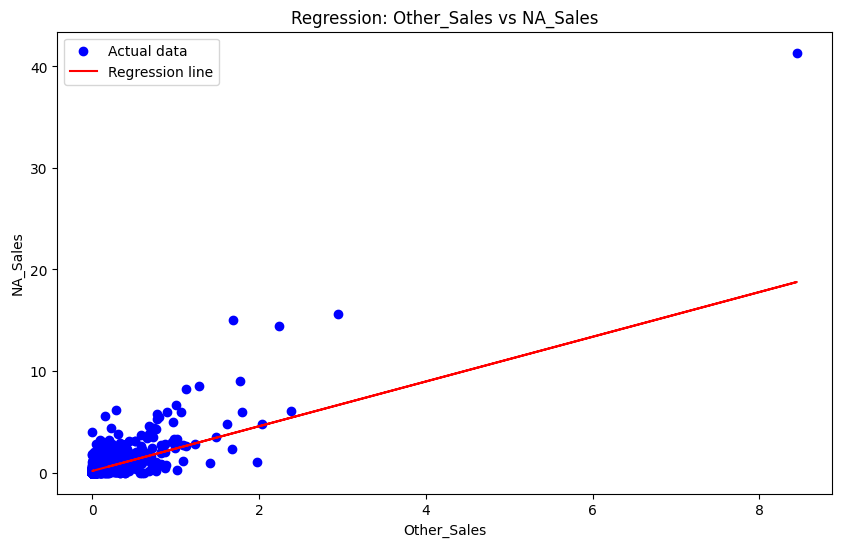

Mean Squared Error: 0.32389631653015366
R^2 Score: 0.5891747178442405


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between Other_Sales and EU_Sales: 0.7227955149848964


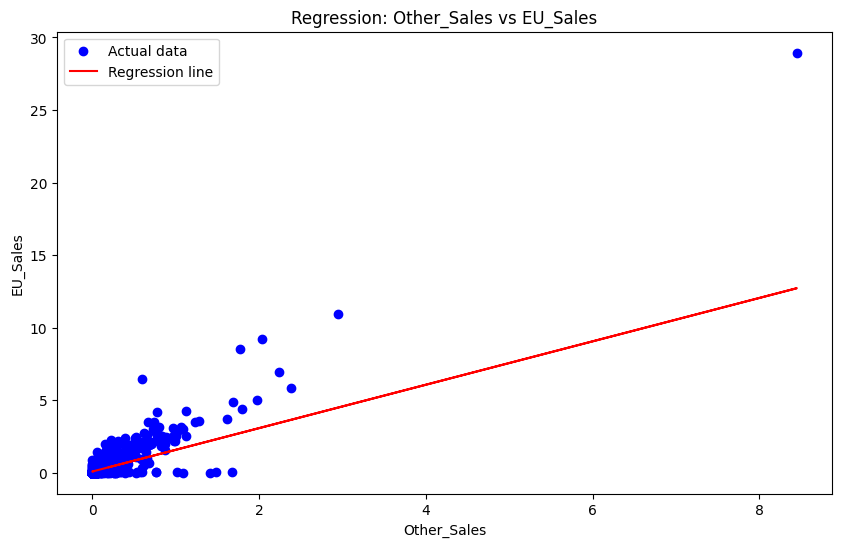

Mean Squared Error: 0.13615889145231175
R^2 Score: 0.6326009090974862


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between Other_Sales and Global_Sales: 0.7492421115149719


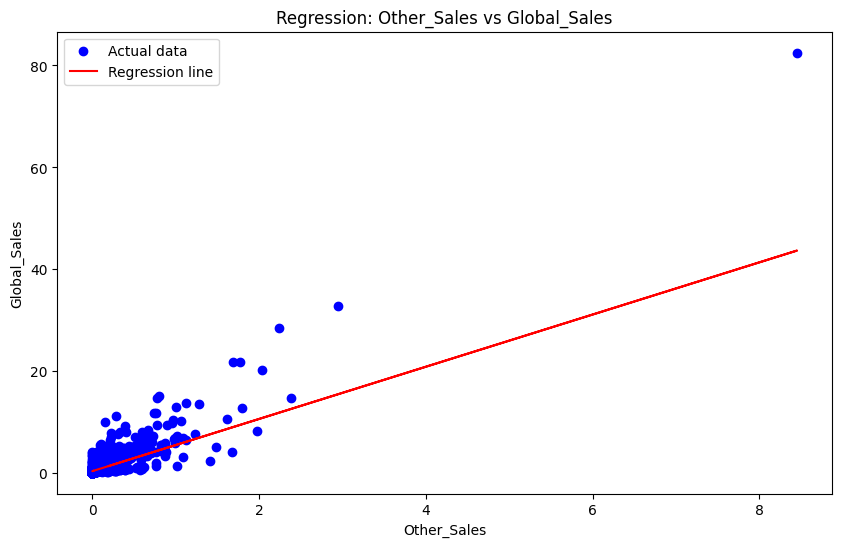

Mean Squared Error: 0.9673279704948016
R^2 Score: 0.6944923957118804


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between Global_Sales and NA_Sales: 0.9410104942592599


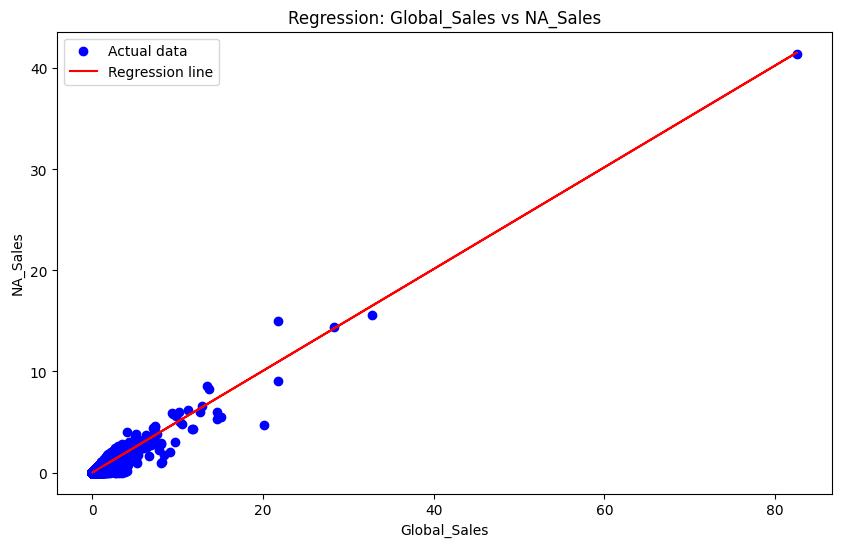

Mean Squared Error: 0.05711516888067015
R^2 Score: 0.9275559672238795


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between Global_Sales and EU_Sales: 0.9012386982359578


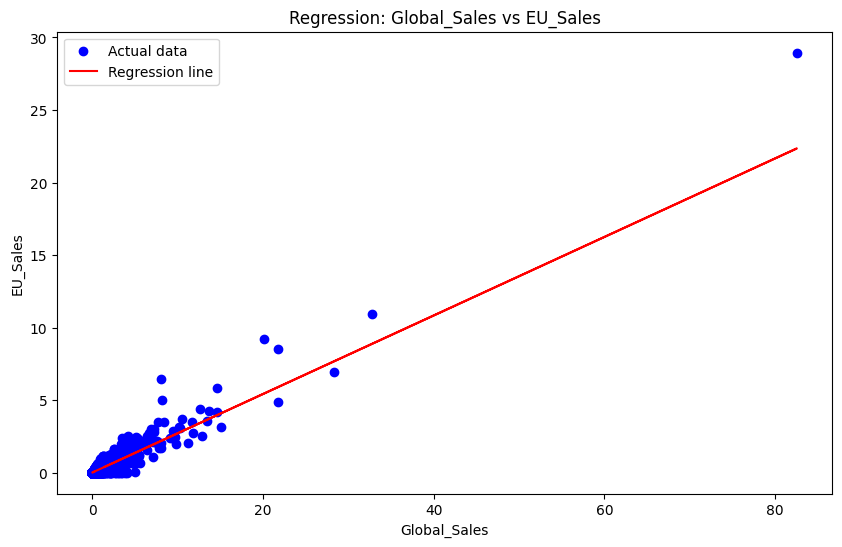

Mean Squared Error: 0.04239866759064114
R^2 Score: 0.8855951913082724


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between Global_Sales and JP_Sales: 0.6123001376779326


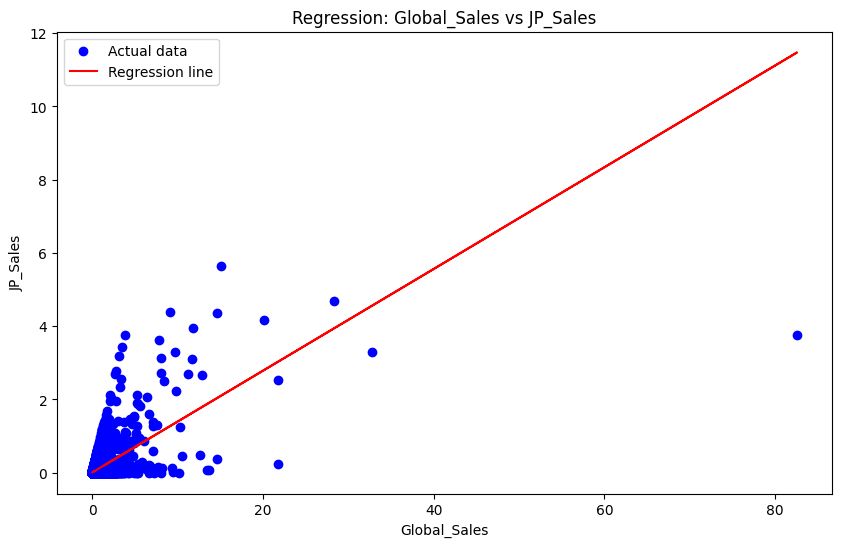

Mean Squared Error: 0.06765679422241183
R^2 Score: 0.2603245014499951


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between Global_Sales and Other_Sales: 0.7492421115149719


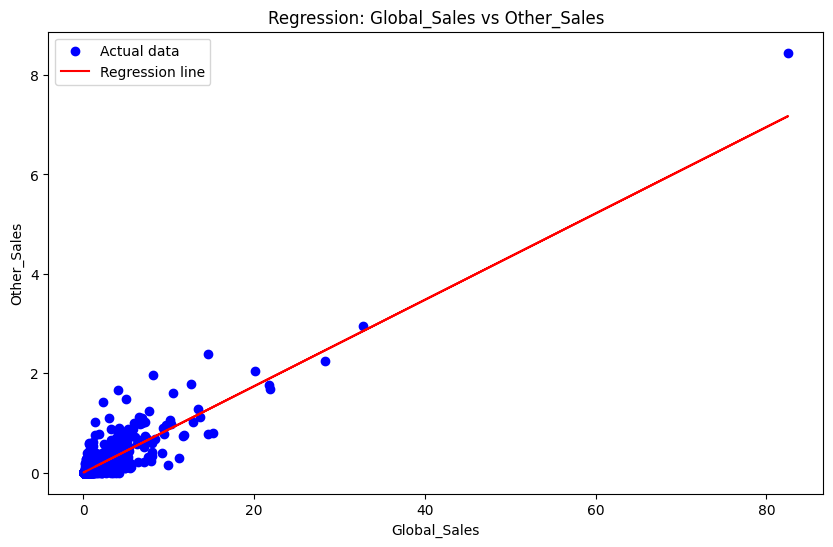

Mean Squared Error: 0.005784353624431409
R^2 Score: 0.8324473876541113


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between Critic_Score and User_Score: 0.5808778320767244


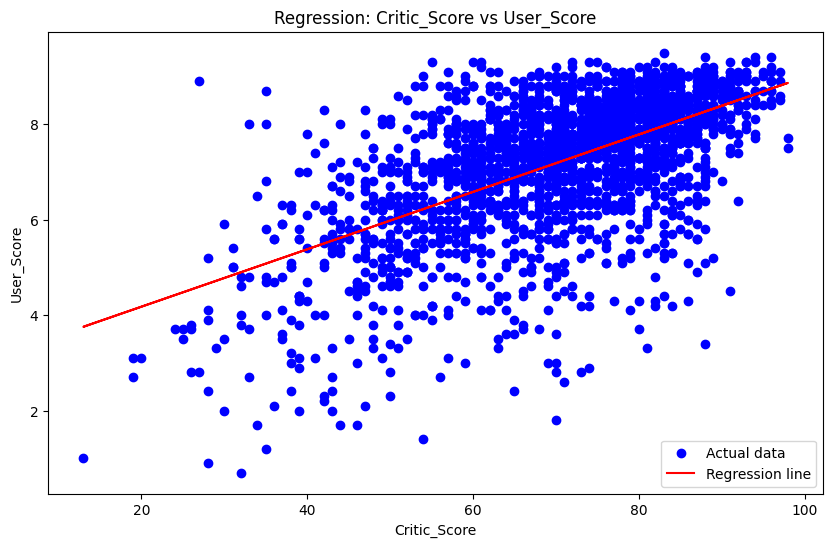

Mean Squared Error: 1.4106351267591186
R^2 Score: 0.3452143837267626


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between User_Score and Critic_Score: 0.5808778320767244


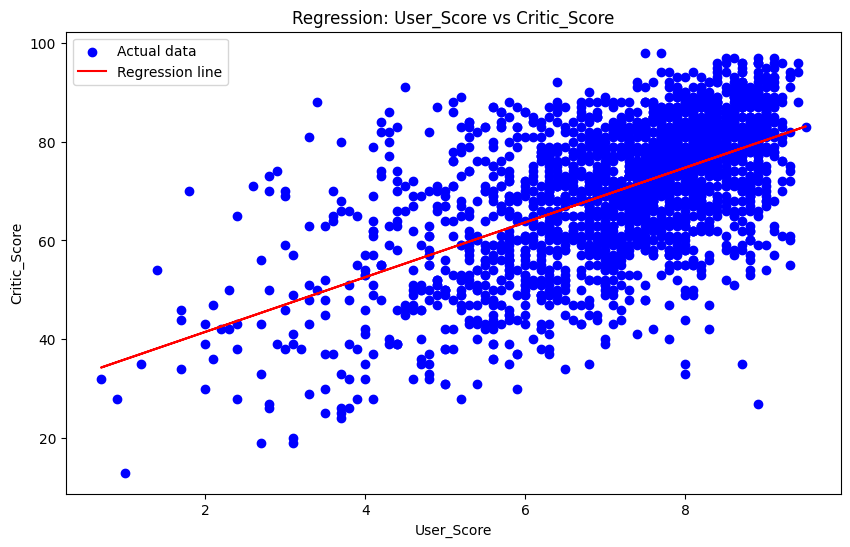

Mean Squared Error: 132.44918221335755
R^2 Score: 0.3459799296650319


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between Developer and Rating: 0.5416662637198333
Skipping regression for Developer and Rating because one or both columns are not numeric.


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


Analyzing correlation between Rating and Developer: 0.5416662637198333
Skipping regression for Rating and Developer because one or both columns are not numeric.


In [22]:
def preprocess_for_correlation(df):
    # Label encode nas colunas categóricas para trabalhar com valores numéricos
    df_numeric = df.copy()
    for col in df_numeric.columns:
        if df_numeric[col].dtype == 'object':
            df_numeric[col] = df_numeric[col].astype('category').cat.codes
    return df_numeric

def perform_regression(df, col_x, col_y):
    
    df_clean = df[[col_x, col_y]].dropna()
    
    # Verifica se ambas as colunas são numéricas
    if df_clean[col_x].dtype not in ['int64', 'float64'] or df_clean[col_y].dtype not in ['int64', 'float64']:
        print(f"Skipping regression for {col_x} and {col_y} because one or both columns are not numeric.")
        return
    
    # Separando as colunas e removendo valores nulos
    X = df_clean[[col_x]].dropna()
    y = df_clean[col_y].loc[X.index]  # Garantindo que os índices de X e y correspondam
    
    # Dividindo em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Regressão linear
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predizendo no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Avaliando a regressão
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Exibindo o gráfico da regressão
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual data')
    plt.plot(X_test, y_pred, color='red', label='Regression line')
    plt.title(f'Regression: {col_x} vs {col_y}')
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.legend()
    plt.show()
    
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

def analyze_correlations_and_regression(df):
    # Preprocessar para garantir que as colunas categóricas sejam numéricas
    df_processed = preprocess_for_correlation(df)
    
    # Calculando a matriz de correlação
    corr_matrix = df_processed.corr()

    # Iterando sobre a matriz de correlação para encontrar pares que satisfaçam a condição
    for col_x in corr_matrix.columns:
        for col_y in corr_matrix.columns:
            if col_x != col_y:  # Evitar comparar a mesma coluna
                corr_value = corr_matrix.loc[col_x, col_y]
                if (corr_value > 0.5) or (corr_value < -0.3):
                    print("\n")
                    print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
                    print("\n")
                    print(f'Analyzing correlation between {col_x} and {col_y}: {corr_value}')
                    # Realizando a regressão linear se a condição for satisfeita
                    perform_regression(df, col_x, col_y)

# Exemplo de como chamar a função com o dataframe
analyze_correlations_and_regression(df)